## **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

2024-02-03 15:28:43.456590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 15:28:43.456693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 15:28:43.584096: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **EDA**

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### No missing values

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### id & Unnamed: 32 columns are not indicating to anything so we can drop it as a part of data cleaning

## **Preprocessing**

In [5]:
df.drop(columns=['id' , 'Unnamed: 32'], inplace= True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
diagnosis = df['diagnosis'].value_counts()
diagnosis

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
fig = px.pie(values = diagnosis,
             names=diagnosis.index,
            template= 'plotly_dark',
             title= 'Distribution of the type of the diagnosis in the dataset'
            )
fig.show()

## **Removing Outliers**

In [8]:
fig = px.box(df['radius_mean'],
             title='quartiles of the radius_mean column',
             template='plotly_dark'
            )
fig.show()

In [9]:
# removing outliers
q1 = df['radius_mean'].quantile(0.25)
q3 = df['radius_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'radius_mean'] > top_range:
        df.loc[i, 'radius_mean'] = top_range
    if df.loc[i, 'radius_mean'] < bottom_range:
        df.loc[i, 'radius_mean'] = bottom_range
fig = px.box(df['radius_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [10]:
fig = px.box(df['texture_mean'],
             title='quartiles of the texture_mean column',
             template='plotly_dark'
            )
fig.show()

In [11]:
# removing outliers
q1 = df['texture_mean'].quantile(0.25)
q3 = df['texture_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'texture_mean'] > top_range:
        df.loc[i, 'texture_mean'] = top_range
    if df.loc[i, 'texture_mean'] < bottom_range:
        df.loc[i, 'texture_mean'] = bottom_range
fig = px.box(df['texture_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [12]:
fig = px.box(df['perimeter_mean'],
             title='quartiles of the perimeter_mean column',
             template='plotly_dark'
            )
fig.show()

In [13]:
# removing outliers
q1 = df['perimeter_mean'].quantile(0.25)
q3 = df['perimeter_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'perimeter_mean'] > top_range:
        df.loc[i, 'perimeter_mean'] = top_range
    if df.loc[i, 'perimeter_mean'] < bottom_range:
        df.loc[i, 'perimeter_mean'] = bottom_range
fig = px.box(df['perimeter_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [14]:
fig = px.box(df['area_mean'],
             title='quartiles of the area_mean column',
             template='plotly_dark'
            )
fig.show()

In [15]:
# removing outliers
q1 = df['area_mean'].quantile(0.25)
q3 = df['area_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'area_mean'] > top_range:
        df.loc[i, 'area_mean'] = top_range
    if df.loc[i, 'area_mean'] < bottom_range:
        df.loc[i, 'area_mean'] = bottom_range
fig = px.box(df['area_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [16]:
fig = px.box(df['smoothness_mean'],
             title='quartiles of the smoothness_mean column',
             template='plotly_dark'
            )
fig.show()

In [17]:
# removing outliers
q1 = df['smoothness_mean'].quantile(0.25)
q3 = df['smoothness_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'smoothness_mean'] > top_range:
        df.loc[i, 'smoothness_mean'] = top_range
    if df.loc[i, 'smoothness_mean'] < bottom_range:
        df.loc[i, 'smoothness_mean'] = bottom_range
fig = px.box(df['smoothness_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [18]:
fig = px.box(df['compactness_mean'],
             title='quartiles of the compactness_mean column',
             template='plotly_dark'
            )
fig.show()

In [19]:
# removing outliers
q1 = df['compactness_mean'].quantile(0.25)
q3 = df['compactness_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'compactness_mean'] > top_range:
        df.loc[i, 'compactness_mean'] = top_range
    if df.loc[i, 'compactness_mean'] < bottom_range:
        df.loc[i, 'compactness_mean'] = bottom_range
fig = px.box(df['compactness_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [20]:
fig = px.box(df['concavity_mean'],
             title='quartiles of the concavity_mean column',
             template='plotly_dark'
            )
fig.show()

In [21]:
# removing outliers
q1 = df['concavity_mean'].quantile(0.25)
q3 = df['concavity_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'concavity_mean'] > top_range:
        df.loc[i, 'concavity_mean'] = top_range
    if df.loc[i, 'concavity_mean'] < bottom_range:
        df.loc[i, 'concavity_mean'] = bottom_range
fig = px.box(df['concavity_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [22]:
fig = px.box(df['concave points_mean'],
             title='quartiles of the concave points_mean column',
             template='plotly_dark'
            )
fig.show()

In [23]:
# removing outliers
q1 = df['concave points_mean'].quantile(0.25)
q3 = df['concave points_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'concave points_mean'] > top_range:
        df.loc[i, 'concave points_mean'] = top_range
    if df.loc[i, 'concave points_mean'] < bottom_range:
        df.loc[i, 'concave points_mean'] = bottom_range
fig = px.box(df['concave points_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [24]:
fig = px.box(df['symmetry_mean'],
             title='quartiles of the concave points_mean column',
             template='plotly_dark'
            )
fig.show()

In [25]:
# removing outliers
q1 = df['symmetry_mean'].quantile(0.25)
q3 = df['symmetry_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'symmetry_mean'] > top_range:
        df.loc[i, 'symmetry_mean'] = top_range
    if df.loc[i, 'symmetry_mean'] < bottom_range:
        df.loc[i, 'symmetry_mean'] = bottom_range
fig = px.box(df['symmetry_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [26]:
fig = px.box(df['fractal_dimension_mean'],
             title='quartiles of the fractal_dimension_mean column',
             template='plotly_dark'
            )
fig.show()

In [27]:
# removing outliers
q1 = df['fractal_dimension_mean'].quantile(0.25)
q3 = df['fractal_dimension_mean'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'fractal_dimension_mean'] > top_range:
        df.loc[i, 'fractal_dimension_mean'] = top_range
    if df.loc[i, 'fractal_dimension_mean'] < bottom_range:
        df.loc[i, 'fractal_dimension_mean'] = bottom_range
fig = px.box(df['fractal_dimension_mean'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [28]:
fig = px.box(df['radius_se'],
             title='quartiles of the radius_se column',
             template='plotly_dark'
            )
fig.show()

In [29]:
# removing outliers
q1 = df['radius_se'].quantile(0.25)
q3 = df['radius_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'radius_se'] > top_range:
        df.loc[i, 'radius_se'] = top_range
    if df.loc[i, 'radius_se'] < bottom_range:
        df.loc[i, 'radius_se'] = bottom_range
fig = px.box(df['radius_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [30]:
fig = px.box(df['texture_se'],
             title='quartiles of the texture_se column',
             template='plotly_dark'
            )
fig.show()

In [31]:
# removing outliers
q1 = df['texture_se'].quantile(0.25)
q3 = df['texture_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'texture_se'] > top_range:
        df.loc[i, 'texture_se'] = top_range
    if df.loc[i, 'texture_se'] < bottom_range:
        df.loc[i, 'texture_se'] = bottom_range
fig = px.box(df['texture_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [32]:
fig = px.box(df['perimeter_se'],
             title='quartiles of the perimeter_se column',
             template='plotly_dark'
            )
fig.show()

In [33]:
# removing outliers
q1 = df['perimeter_se'].quantile(0.25)
q3 = df['perimeter_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'perimeter_se'] > top_range:
        df.loc[i, 'perimeter_se'] = top_range
    if df.loc[i, 'perimeter_se'] < bottom_range:
        df.loc[i, 'perimeter_se'] = bottom_range
fig = px.box(df['perimeter_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [34]:
fig = px.box(df['area_se'],
             title='quartiles of the area_se column',
             template='plotly_dark'
            )
fig.show()

In [35]:
# removing outliers
q1 = df['area_se'].quantile(0.25)
q3 = df['area_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'area_se'] > top_range:
        df.loc[i, 'area_se'] = top_range
    if df.loc[i, 'area_se'] < bottom_range:
        df.loc[i, 'area_se'] = bottom_range
fig = px.box(df['area_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [36]:
fig = px.box(df['smoothness_se'],
             title='quartiles of the smoothness_se column',
             template='plotly_dark'
            )
fig.show()

In [37]:
# removing outliers
q1 = df['smoothness_se'].quantile(0.25)
q3 = df['smoothness_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'smoothness_se'] > top_range:
        df.loc[i, 'smoothness_se'] = top_range
    if df.loc[i, 'smoothness_se'] < bottom_range:
        df.loc[i, 'smoothness_se'] = bottom_range
fig = px.box(df['smoothness_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [38]:
fig = px.box(df['compactness_se'],
             title='quartiles of the compactness_se column',
             template='plotly_dark'
            )
fig.show()

In [39]:
# removing outliers
q1 = df['compactness_se'].quantile(0.25)
q3 = df['compactness_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'compactness_se'] > top_range:
        df.loc[i, 'compactness_se'] = top_range
    if df.loc[i, 'compactness_se'] < bottom_range:
        df.loc[i, 'compactness_se'] = bottom_range
fig = px.box(df['compactness_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [40]:
fig = px.box(df['concavity_se'],
             title='quartiles of the concavity_se column',
             template='plotly_dark'
            )
fig.show()

In [41]:
# removing outliers
q1 = df['concavity_se'].quantile(0.25)
q3 = df['concavity_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'concavity_se'] > top_range:
        df.loc[i, 'concavity_se'] = top_range
    if df.loc[i, 'concavity_se'] < bottom_range:
        df.loc[i, 'concavity_se'] = bottom_range
fig = px.box(df['concavity_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [42]:
fig = px.box(df['concave points_se'],
             title='quartiles of the concave points_se column',
             template='plotly_dark'
            )
fig.show()

In [43]:
# removing outliers
q1 = df['concave points_se'].quantile(0.25)
q3 = df['concave points_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'concave points_se'] > top_range:
        df.loc[i, 'concave points_se'] = top_range
    if df.loc[i, 'concave points_se'] < bottom_range:
        df.loc[i, 'concave points_se'] = bottom_range
fig = px.box(df['concave points_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [44]:
fig = px.box(df['symmetry_se'],
             title='quartiles of the symmetry_se column',
             template='plotly_dark'
            )
fig.show()

In [45]:
# removing outliers
q1 = df['symmetry_se'].quantile(0.25)
q3 = df['symmetry_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'symmetry_se'] > top_range:
        df.loc[i, 'symmetry_se'] = top_range
    if df.loc[i, 'symmetry_se'] < bottom_range:
        df.loc[i, 'symmetry_se'] = bottom_range
fig = px.box(df['symmetry_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [46]:
fig = px.box(df['fractal_dimension_se'],
             title='quartiles of the fractal_dimension_se column',
             template='plotly_dark'
            )
fig.show()

In [47]:
# removing outliers
q1 = df['fractal_dimension_se'].quantile(0.25)
q3 = df['fractal_dimension_se'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'fractal_dimension_se'] > top_range:
        df.loc[i, 'fractal_dimension_se'] = top_range
    if df.loc[i, 'fractal_dimension_se'] < bottom_range:
        df.loc[i, 'fractal_dimension_se'] = bottom_range
fig = px.box(df['fractal_dimension_se'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [48]:
fig = px.box(df['radius_worst'],
             title='quartiles of the radius_worst column',
             template='plotly_dark'
            )
fig.show()

In [49]:
# removing outliers
q1 = df['radius_worst'].quantile(0.25)
q3 = df['radius_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'radius_worst'] > top_range:
        df.loc[i, 'radius_worst'] = top_range
    if df.loc[i, 'radius_worst'] < bottom_range:
        df.loc[i, 'radius_worst'] = bottom_range
fig = px.box(df['radius_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [50]:
fig = px.box(df['texture_worst'],
             title='quartiles of the texture_worst column',
             template='plotly_dark'
            )
fig.show()

In [51]:
# removing outliers
q1 = df['texture_worst'].quantile(0.25)
q3 = df['texture_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'texture_worst'] > top_range:
        df.loc[i, 'texture_worst'] = top_range
    if df.loc[i, 'texture_worst'] < bottom_range:
        df.loc[i, 'texture_worst'] = bottom_range
fig = px.box(df['texture_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [52]:
fig = px.box(df['perimeter_worst'],
             title='quartiles of the perimeter_worst column',
             template='plotly_dark'
            )
fig.show()

In [53]:
# removing outliers
q1 = df['perimeter_worst'].quantile(0.25)
q3 = df['perimeter_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'perimeter_worst'] > top_range:
        df.loc[i, 'perimeter_worst'] = top_range
    if df.loc[i, 'perimeter_worst'] < bottom_range:
        df.loc[i, 'perimeter_worst'] = bottom_range
fig = px.box(df['perimeter_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [54]:
fig = px.box(df['area_worst'],
             title='quartiles of the area_worst column',
             template='plotly_dark'
            )
fig.show()

In [55]:
# removing outliers
q1 = df['area_worst'].quantile(0.25)
q3 = df['area_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'area_worst'] > top_range:
        df.loc[i, 'area_worst'] = top_range
    if df.loc[i, 'area_worst'] < bottom_range:
        df.loc[i, 'area_worst'] = bottom_range
fig = px.box(df['area_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [56]:
fig = px.box(df['smoothness_worst'],
             title='quartiles of the smoothness_worst column',
             template='plotly_dark'
            )
fig.show()

In [57]:
# removing outliers
q1 = df['smoothness_worst'].quantile(0.25)
q3 = df['smoothness_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'smoothness_worst'] > top_range:
        df.loc[i, 'smoothness_worst'] = top_range
    if df.loc[i, 'smoothness_worst'] < bottom_range:
        df.loc[i, 'smoothness_worst'] = bottom_range
fig = px.box(df['smoothness_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [58]:
fig = px.box(df['compactness_worst'],
             title='quartiles of the compactness_worst column',
             template='plotly_dark'
            )
fig.show()

In [59]:
# removing outliers
q1 = df['compactness_worst'].quantile(0.25)
q3 = df['compactness_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'compactness_worst'] > top_range:
        df.loc[i, 'compactness_worst'] = top_range
    if df.loc[i, 'compactness_worst'] < bottom_range:
        df.loc[i, 'compactness_worst'] = bottom_range
fig = px.box(df['compactness_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [60]:
fig = px.box(df['concavity_worst'],
             title='quartiles of the concavity_worst column',
             template='plotly_dark'
            )
fig.show()

In [61]:
# removing outliers
q1 = df['concavity_worst'].quantile(0.25)
q3 = df['concavity_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'concavity_worst'] > top_range:
        df.loc[i, 'concavity_worst'] = top_range
    if df.loc[i, 'concavity_worst'] < bottom_range:
        df.loc[i, 'concavity_worst'] = bottom_range
fig = px.box(df['concavity_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [62]:
fig = px.box(df['concave points_worst'],
             title='quartiles of the concave points_worst column',
             template='plotly_dark'
            )
fig.show()

In [63]:
fig = px.box(df['symmetry_worst'],
             title='quartiles of the symmetry_worst column',
             template='plotly_dark'
            )
fig.show()

In [64]:
# removing outliers
q1 = df['symmetry_worst'].quantile(0.25)
q3 = df['symmetry_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'symmetry_worst'] > top_range:
        df.loc[i, 'symmetry_worst'] = top_range
    if df.loc[i, 'symmetry_worst'] < bottom_range:
        df.loc[i, 'symmetry_worst'] = bottom_range
fig = px.box(df['symmetry_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [65]:
fig = px.box(df['fractal_dimension_worst'],
             title='quartiles of the fractal_dimension_worst column',
             template='plotly_dark'
            )
fig.show()

In [66]:
# removing outliers
q1 = df['fractal_dimension_worst'].quantile(0.25)
q3 = df['fractal_dimension_worst'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'fractal_dimension_worst'] > top_range:
        df.loc[i, 'fractal_dimension_worst'] = top_range
    if df.loc[i, 'fractal_dimension_worst'] < bottom_range:
        df.loc[i, 'fractal_dimension_worst'] = bottom_range
fig = px.box(df['fractal_dimension_worst'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [67]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [68]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [69]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, shuffle=True , random_state=42)

In [71]:
X_train.shape

(512, 30)

## **Model Structure**

In [72]:
model = Sequential([
    Dense(16 , activation='relu' , input_dim= 30,),
    Dense(8 , activation= 'relu'),
#     Dense(8 , activation= 'relu'),
    Dense(1, activation= 'sigmoid') # if we put 1(number of neurons) then the activation function is sigmoid if we put 2 then the activation function is softmax
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
history = model.fit(X_train , y_train, epochs= 160 , validation_split=0.2)

Epoch 1/160


I0000 00:00:1706974148.305790      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 [==============================] - 3s 20ms/step - loss: 0.7256 - accuracy: 0.3007 - val_loss: 0.6906 - val_accuracy: 0.5534
Epoch 2/160
13/13 [==============================] - 0s 5ms/step - loss: 0.6793 - accuracy: 0.5746 - val_loss: 0.6642 - val_accuracy: 0.6602
Epoch 3/160
13/13 [==============================] - 0s 5ms/step - loss: 0.6384 - accuracy: 0.7188 - val_loss: 0.6401 - val_accuracy: 0.6796
Epoch 4/160
13/13 [==============================] - 0s 5ms/step - loss: 0.6053 - accuracy: 0.7800 - val_loss: 0.6160 - val_accuracy: 0.7282
Epoch 5/160
13/13 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.7775 - val_loss: 0.5940 - val_accuracy: 0.7282
Epoch 6/160
13/13 [==============================] - 0s 6ms/step - loss: 0.5486 - accuracy: 0.8264 - val_loss: 0.5676 - val_accuracy: 0.7767
Epoch 7/160
13/13 [==============================] - 0s 6ms/step - loss: 0.5216 - accuracy: 0.8313 - val_loss: 0.5473 - val_accuracy: 0.7864
Epoch 8/160
13/13 [=====

## **Evaluation**

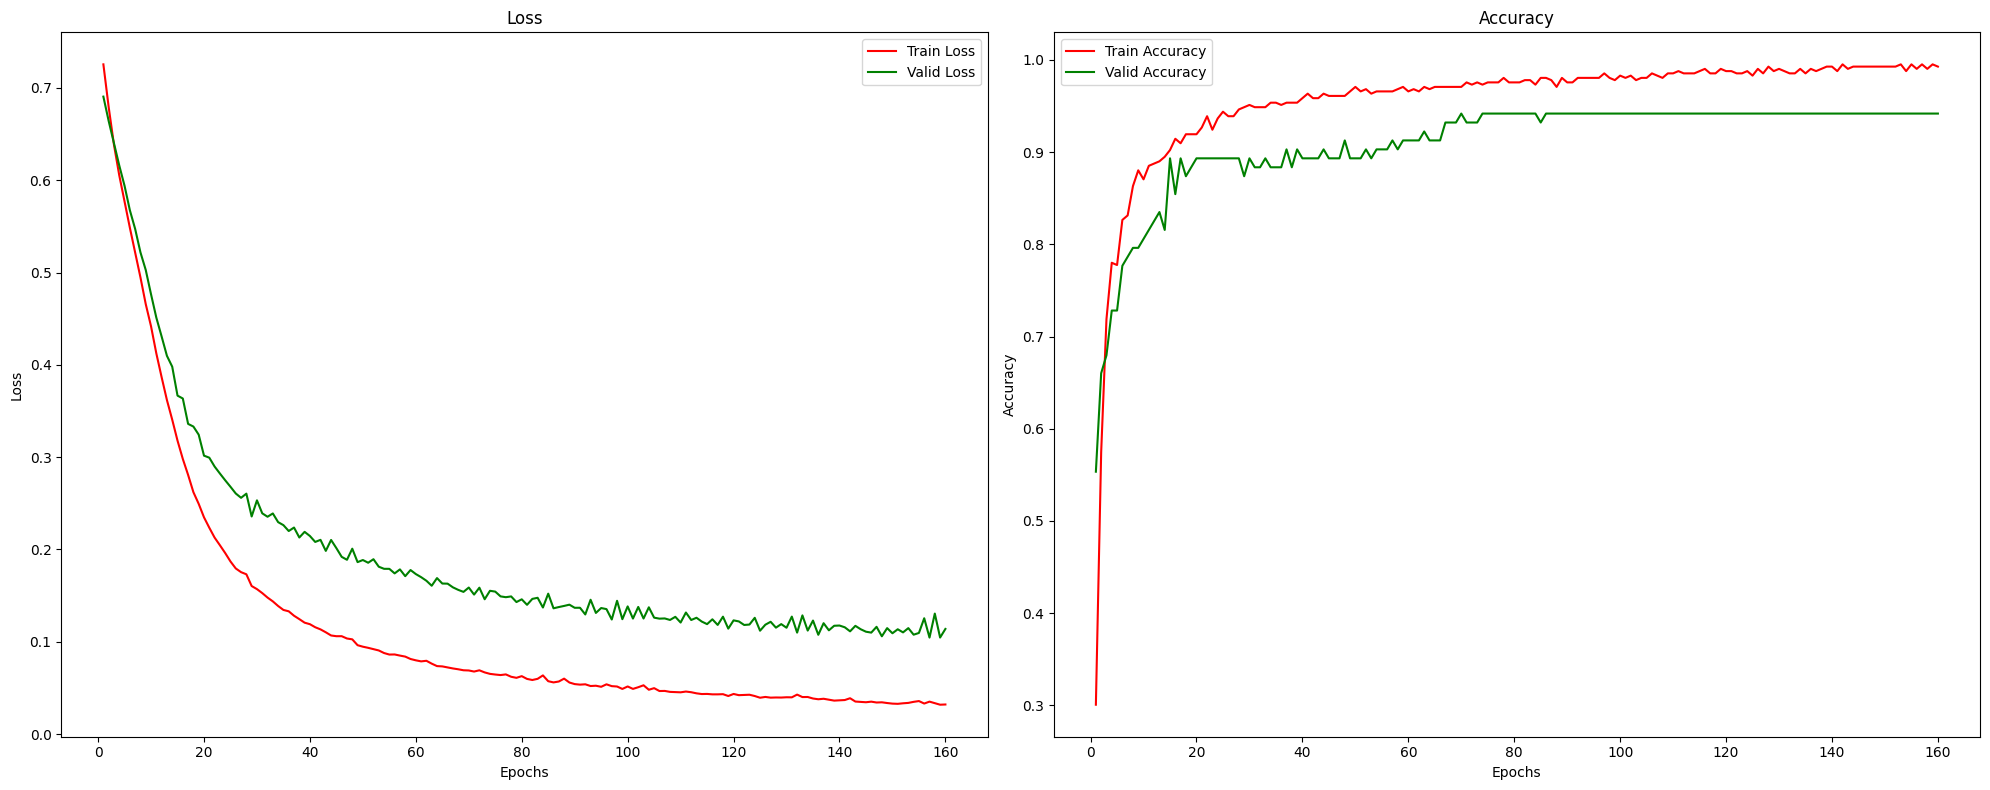

In [74]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

## **Prediction**

In [75]:
y_predict = model.predict(X_test)
y_predict = (y_predict > 0.5)

2/2 [==============================] - 0s 3ms/step


In [76]:
cm = confusion_matrix(y_test , y_predict)
cm

array([[40,  0],
       [ 1, 16]])

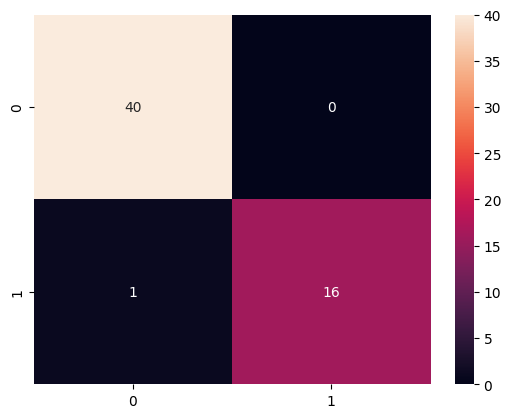

In [77]:
sns.heatmap(cm, annot= True);

In [78]:
model.save('model.h5')